In [1]:
import os
from ipynb.fs.full.preprocessing import parse_poems, parse_lines
from HMM_soln import unsupervised_HMM

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 10, 24, 21, 25, 13, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 34, 46, 34, 47, 28, 34, 48, 46, 49, 50, 26, 6, 51, 52, 15, 53, 54, 55, 56, 57, 58, 28, 15, 59, 60, 61, 29, 30, 62, 63, 34, 64, 56, 22, 65, 66, 67, 68, 69, 70, 15, 71, 72, 73, 74, 75, 76, 28, 77, 15, 53, 78, 18, 15, 79, 56, 80], [81, 82, 83, 84, 85, 34, 86, 56, 87, 88, 89, 68, 34, 8, 90, 34, 91, 92, 93, 94, 95, 96, 52, 97, 76, 41, 98, 99, 100, 101, 102, 103, 104, 105, 106, 43, 107, 34, 108, 45, 43, 107, 15, 109, 100, 34, 110, 111, 28, 112, 61, 29, 30, 88, 113, 32, 114, 115, 116, 117, 56, 118, 119, 120, 121, 122, 119, 123, 34, 8, 124, 125, 26, 126, 127, 74, 128, 129, 100, 130, 84, 131, 132, 133, 56, 134, 132, 135, 136, 137, 21, 108, 18, 138, 29, 74, 114, 28, 76, 139, 140, 81, 26, 51, 135, 56, 141, 34, 142, 143, 81, 26, 144, 145, 146], [147, 68, 34, 148, 56, 149, 15, 150, 26, 151, 52, 152, 15, 19, 6, 150

obs_map_reverser() and sample_sentence() functions modified from Homework 6's HMM_helper.py by Andrew Kang

In [2]:
def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

def sample_sentence(hmm, obs_map, n_words=100):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    # Sample and convert sentence.
    emission, states = hmm.generate_emission(n_words)
    sentence = [obs_map_r[i] for i in emission]

    return ' '.join(sentence).capitalize()

def generate_obs(hmm, obs_map):
    '''
    Naively generates 14-line sonnet with 8 words each.
    
    Inputs:
    hmm: trained hmm
    obs_map: maps word to observation index
    
    Outputs:
    None
    '''
    # generate all words in sonnet
    all_words = sample_sentence(hmm, obs_map, 112)
    all_words = all_words.split(' ')
    
    # split into 14 lines and add capitalization/naive punctuation
    for i in range(14):
        count = 0
        line = ' '.join(all_words[i*8:(i+1)*8]).capitalize()
        if i < 11 or i == 12:
            line += ','
        else:
            line += '.'
        print(line)

def generate_by_line(hmm, obs_map):
    for i in range(14):
        line = sample_sentence(hmm, obs_map, 8)
        if i < 11 or i == 12:
            line += ','
        else:
            line += '.'
        print(line)

In [3]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
obs, obs_map = parse_lines(text)

In [4]:
hmm2 = unsupervised_HMM(obs, 2, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [5]:
hmm4 = unsupervised_HMM(obs, 4, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [6]:
hmm6 = unsupervised_HMM(obs, 6, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [7]:
hmm8 = unsupervised_HMM(obs, 8, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [8]:
hmm12 = unsupervised_HMM(obs, 12, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [9]:
# in naive implementation, simply generate 14-line sonnet without enforcing rhyme/meter, etc.
generate_obs(hmm2, obs_map)

If that some air nerves blind the least,
Not you times one can i tell the,
Never in my is be of wear in,
Tender mothers simple night wise exchanged wise expiate,
Ever in please her truth what wilt walks,
Can onwards loves so mind or she niggard,
Affairs his waste worths story the sullied more,
Eye care him foul her one beautys so,
Should thou love a i return subtleties give,
You hath mine must enmity in whateer sometime,
Make vexed pierced her to the eyes know,
Shall part doom some and me in offence.
In thee of takes as that come now,
Should still i they lengths i beguile are.


In [10]:
generate_by_line(hmm2, obs_map)

To lovers self mine all painted self will,
With life art others sightless lusty by do,
Calls although flies their o and mad nobler,
While unbless life thence wherefore lie give from,
Verse trespass gathered my of hawks the babe,
A good dare summers i a some gentle,
Scope live and faults acquainted which and fleeting,
To me robs minds dote doth lose sweet,
The doth leads unlearned lambs despise newer true,
It music love to critic is thou thou,
Be bearing shall every own times victories thou,
Love mine your any mourning stoln third of.
The ill say thou find to father discontent,
Blind it rich one had beauty come that.


In [11]:
generate_obs(hmm4, obs_map)

Noted thought mine in a to and less,
The count i hath should you stars verse,
And at this so rare deserts their looks,
Would live it would any lovst precious or,
Of these respect my thy very for beauty,
Rise swift love among still you strength too,
Pourst and where dulness all thy wait i,
Specialblest to self and delight with the check,
Process to thought me before that possessing in,
Thereof gentle best thee looked worths call heaven,
Were releasing distilled of of thou days within,
One dost that in to i dost confounds.
Discourse walks dispense the honour of evermore everywhere,
Thy in much in like thy second thy.


In [12]:
generate_by_line(hmm4, obs_map)

To year so thy turn my grown last,
All the wouldst thou more i chide all,
When mine world situation precious to his self,
Thief of all away from right hath truth,
You sessions of thou palate love fist need,
In me of sovereign history her gentle conquest,
Do make dead my hath day thee checked,
Ill my she own in the ah speaking,
Tribes bring old worthier blood eyes on shall,
Potions afterwards when loss belied objects if and,
Making though time worths queen thou made so,
Self to down thine knit confounding in dross.
Sight as reckoning gives where on in on,
Friends thou be sullen thy self yet winters.


In [13]:
generate_obs(hmm6, obs_map)

To tomorrow simple the niggarding is review colour,
All i repair ever truth have in lame,
Lines riches or oft in do nothing dear,
Ragged earth he loss offence long clay are,
Torment give compeers alive thou or the harmful,
The seeing possessed but nothing now like thee,
In love done should are not me what,
Place know in mine never am must tears,
Friend franticmad you sepulchres with memorial although my,
Suited is invention doth my thievish die there,
Princes deeds the the wasted white to none,
Mine sweet from fears water in dull or.
Which offences of to quality hath they then,
Any delves art back and inhearse into dumb.


In [14]:
generate_by_line(hmm6, obs_map)

Now all the stores our tyranny to all,
Was hath mistake lovst times yours it ill,
Shall beguile it temperate thy bloody work each,
Crawls thou it the doth will me adonis,
In false thee be to and babe thou,
That come he beauty thou this lives one,
Proof changes doth admiring the are up his,
Each that no grew fleeting thoughts with not,
Beauty before against thy youth like of flattered,
When now age when for me be my,
Self mightst give duty but with of natures,
The whom looks famoused i on compeers the.
Can not these be if in doth find,
The ransom towards be that ink the spoil.


In [15]:
generate_obs(hmm8, obs_map)

We wood more in thou art i abuse,
From beauteous i so white your not for,
This deeds treason used blessed glance i thee,
Worth be gazed that wit graces lovely so,
In with i on familiar ere show or,
I maiden in for laid of he so,
My sing outgoing i disdain side each loves,
We to pleasure wrinkles the of likeness of,
Array ages you should where i if child,
Blind from ever in times travel i not,
When the thee to with complexion record in,
Times thee surmount thing to charter unset and.
It lily thy have be sweet i with,
Dead thy light knowst thee where holy ere.


In [16]:
generate_by_line(hmm8, obs_map)

Nature where gives take do parts no me,
Enough beshrew if not robs thoughts every already,
No other must face see me presents of,
Heavens to heavy that thy dear shown return,
Eyes straight gilded boast and pardon wantonly purple,
They days trespass with had friend thrusts dear,
Even the evil i brave keepst thou and,
Mind from so me yet the constant now,
What doublevantage turns shamefully one gives to fortify,
Thee head shall could dreaming rudely you death,
Yet lamb winters as nothing to edge shall,
Like a a and the stars bareness wonder.
Decrepit in not sway desert lilys thou outlive,
Me defeated thou gives and mind astonished thy.


In [17]:
generate_obs(hmm12, obs_map)

Being in more none of the sound i,
A self when birds against so love with,
Remembered head to need breast that your sweet,
And thy night of tied beauty by grieve,
Be eye hate sweet love sight thy pupil,
Thoughts from that thou are nature make who,
But thence doth ornaments near make own and,
Thy worms thought going the that he do,
Any strains my foes why not lies is,
Child bear all gives if all have figure,
A in them is in too and care,
These correspondence pleasure from prison am old had.
Leaves presage more i the worlds they behold,
Take each but leave strongly wrack to night.


In [18]:
generate_by_line(hmm12, obs_map)

Love pleasure for glory to blessed eye when,
Reason weed while main me child to black,
Spirit thee out love thy me i the,
She whats of not and snow adulterate way,
Nor if praise nimble by within as place,
Counting heres monsters next do love disgraced frank,
Building defence growing will mine that benefit unswayed,
Not done as rocks wait roses do thereby,
Will sinful think of waste that very as,
More his saint that in by as world,
In wellcontented painting be eye by ground the,
How now woe many want did swear a.
If give straight fair eye were but to,
Shall my brand to that thou come filching.


In [19]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# do some basic visualizations 
wordcloud = WordCloud(max_words=100).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Used Words in Shakespearean Sonnets', fontsize=12)
plt.savefig('figures/sonnet_wordcloud.png')

In [20]:
from HMM_helper import (
    states_to_wordclouds,
    animate_emission
)

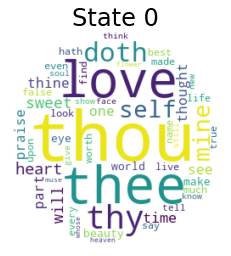

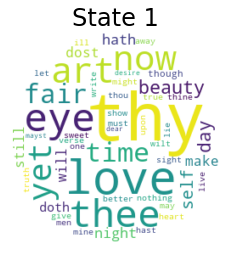

In [21]:
wordclouds = states_to_wordclouds(hmm2, obs_map)

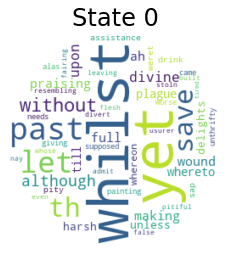

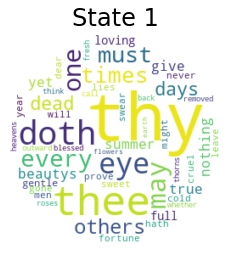

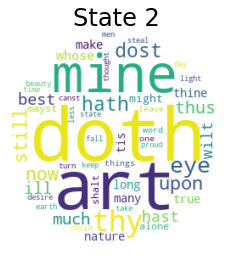

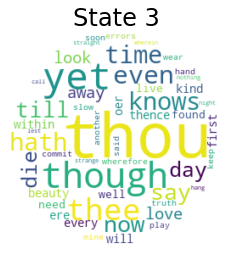

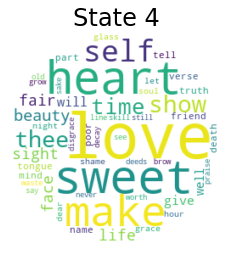

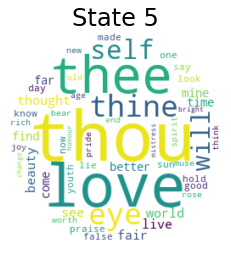

In [22]:
wordclouds = states_to_wordclouds(hmm6, obs_map)

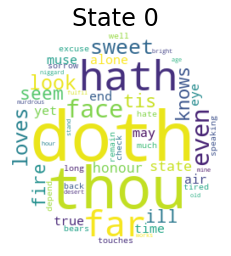

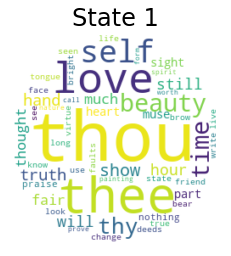

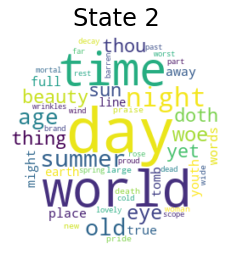

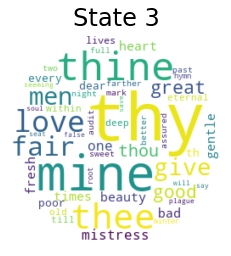

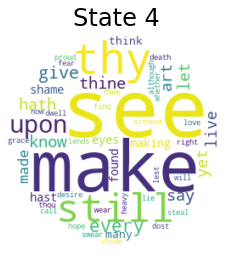

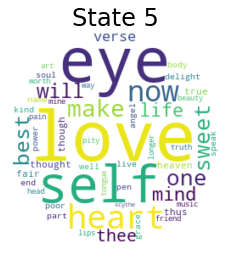

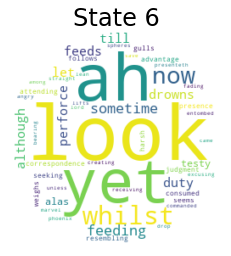

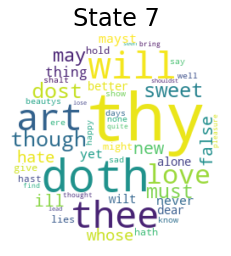

In [23]:
wordclouds = states_to_wordclouds(hmm8, obs_map)

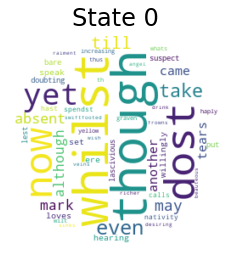

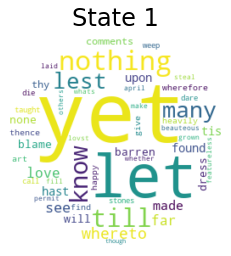

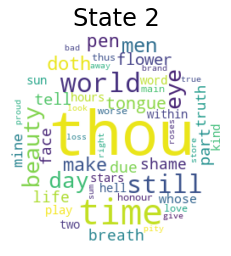

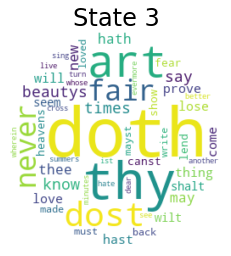

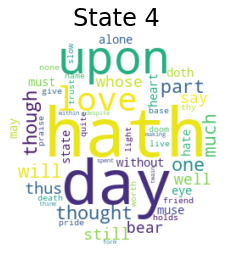

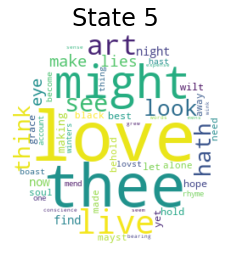

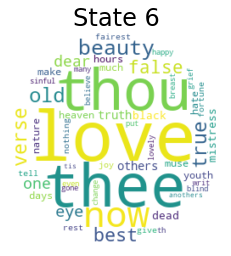

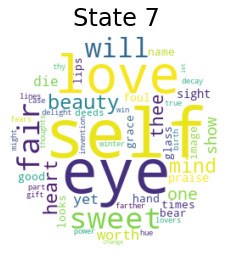

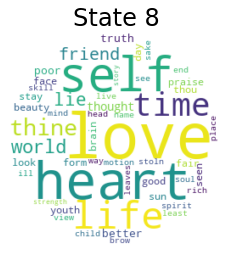

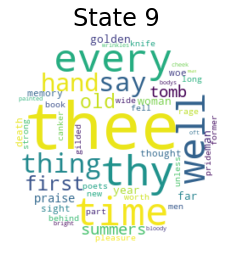

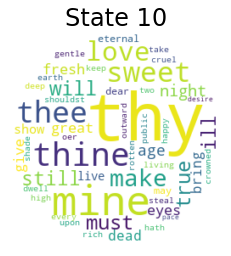

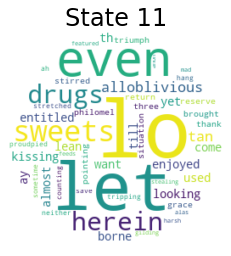

In [24]:
wordclouds = states_to_wordclouds(hmm12, obs_map)


Animating...


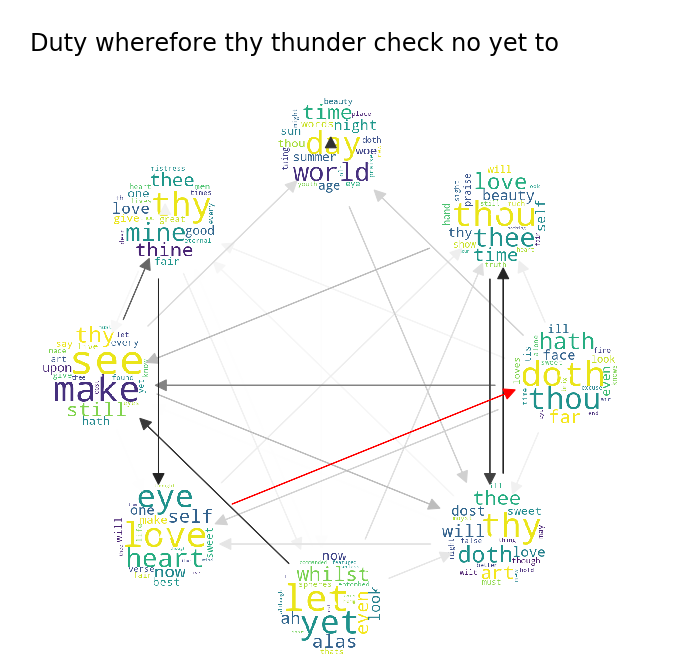

In [25]:
from IPython.display import HTML

anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())